<a href="https://colab.research.google.com/github/Niroshakarthik/ml_projects/blob/main/Finalusedcarpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Used Car price prediction: Predicting the prices of used cars and evaluating them on the
basis of RMSE.


In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('/content/train1.csv')
df_test=pd.read_csv('/content/test.csv')

In [3]:
df_train.shape

(188533, 13)

In [4]:
df_test.shape

(125690, 12)

In [5]:
df_train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [6]:
missing_percentage = df_train.isnull().mean() * 100
print(missing_percentage)

id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.696080
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.300568
clean_title     11.360876
price            0.000000
dtype: float64


In [7]:
df_train.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [8]:
df_train['clean_title'].mode()[0]


'Yes'

In [9]:
df_train.fillna({'clean_title': 'Yes'}, inplace=True)

In [10]:
df_train['clean_title'].isnull().sum()

0

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [13]:
df_test.shape

(125690, 12)

In [14]:
df_test.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [15]:
missing_percentage = df_test.isnull().mean() * 100
print(missing_percentage)

id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.691543
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.298433
clean_title     11.328666
dtype: float64


In [16]:
df_test.fillna({'clean_title': 'Yes'}, inplace=True)

In [17]:
df_test['clean_title'].isnull().sum()

0

In [18]:
df_test.dropna(inplace=True)

In [19]:
df_train[df_train.duplicated()]


Empty DataFrame
Columns: [id, brand, model, model_year, milage, fuel_type, engine, transmission, ext_col, int_col, accident, clean_title, price]
Index: []

In [20]:
df_test[df_test.duplicated()]


Empty DataFrame
Columns: [id, brand, model, model_year, milage, fuel_type, engine, transmission, ext_col, int_col, accident, clean_title]
Index: []

In [21]:
df_train.describe()

id     model_year         milage         price
count  181067.000000  181067.000000  181067.000000  1.810670e+05
mean    94240.503659    2015.688215   66894.919996  4.326172e+04
std     54429.282684       5.672103   49905.983232  7.869092e+04
min         0.000000    1974.000000     100.000000  2.000000e+03
25%     47111.500000    2013.000000   25000.000000  1.675000e+04
50%     94240.000000    2017.000000   59400.000000  3.000000e+04
75%    141377.500000    2020.000000   96476.000000  4.860000e+04
max    188532.000000    2024.000000  405000.000000  2.954083e+06

In [22]:
df_test.describe()

id     model_year         milage
count  120714.000000  120714.000000  120714.000000
mean   251393.398231    2015.654721   67247.508591
std     36279.563360       5.685456   50354.215433
min    188533.000000    1974.000000     100.000000
25%    219935.250000    2013.000000   25108.000000
50%    251422.500000    2017.000000   59338.000000
75%    282782.750000    2020.000000   97000.000000
max    314222.000000    2024.000000  405000.000000

In [23]:
df_train.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [24]:
df_train["brand"].unique()


array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Cadillac', 'Land', 'GMC', 'Toyota', 'Hyundai',
       'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM', 'Hummer', 'Alfa',
       'INFINITI', 'Jeep', 'Porsche', 'McLaren', 'Honda', 'Lexus',
       'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia', 'Mitsubishi',
       'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn', 'Bentley', 'Tesla',
       'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini', 'Chrysler',
       'Lucid', 'Lotus', 'Scion', 'Plymouth', 'Suzuki', 'FIAT', 'Saab',
       'Bugatti', 'Mercury', 'Karma', 'Maybach', 'smart', 'Polestar'],
      dtype=object)

In [25]:
df_train["model"].value_counts()

model
F-150 XLT             2881
M3 Base               2208
Camaro 2SS            1696
M4 Base               1612
Mustang GT Premium    1516
                      ... 
Taycan                   1
X5 3.0i                  1
Model S Plaid            1
X5 xDrive40e             1
ForTwo Pure              1
Name: count, Length: 1888, dtype: int64

In [26]:
df_train["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       '–', 'not supported'], dtype=object)

In [27]:
df_train["fuel_type"].value_counts()

fuel_type
Gasoline          163853
Hybrid              6741
E85 Flex Fuel       5328
Diesel              3854
–                    764
Plug-In Hybrid       512
not supported         15
Name: count, dtype: int64

In [28]:
df_train['fuel_type'] = df_train['fuel_type'].replace( '–	','unknown')
df_train["fuel_type"].value_counts()

fuel_type
Gasoline          163853
Hybrid              6741
E85 Flex Fuel       5328
Diesel              3854
–                    764
Plug-In Hybrid       512
not supported         15
Name: count, dtype: int64

In [29]:
df_train["fuel_type"].value_counts()

fuel_type
Gasoline          163853
Hybrid              6741
E85 Flex Fuel       5328
Diesel              3854
–                    764
Plug-In Hybrid       512
not supported         15
Name: count, dtype: int64

In [30]:
df_train["engine"].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       'Battery Electric',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [31]:
df_train["engine"].value_counts()

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3451
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2876
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2805
2.0L I4 16V GDI DOHC Turbo                             2633
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2430
                                                       ... 
500.0HP Electric Motor Electric Fuel System               1
139.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid        1
321.0HP Electric Motor Electric Fuel System               1
533.0HP Electric Motor Electric Fuel System               1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1108, dtype: int64

In [32]:
df_train["transmission"].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '6-Speed A/T', '10-Speed A/T',
       '9-Speed A/T', '8-Speed Automatic', '9-Speed Automatic',
       '5-Speed A/T', '7-Speed Automatic with Auto-Shift', 'Automatic',
       'CVT Transmission', '5-Speed M/T', 'M/T', '6-Speed M/T',
       '6-Speed Automatic', '4-Speed Automatic', '7-Speed M/T',
       'Automatic CVT', '4-Speed A/T', '2-Speed A/T', '6-Speed Manual',
       'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '1-Speed A/T', '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', '1-Speed Automatic', 'Manual', '–', '2',
       '6 Speed At/Mt', '5-Speed Automatic', '2-Speed Automatic',
       '8-SPEED A/T', '7-Speed', 'Variable', 'Single-Speed Fixed Gear',
       '8-SPEED AT', 

In [33]:
df_train["transmission"].value_counts()

transmission
A/T                                                   46993
8-Speed A/T                                           20269
Transmission w/Dual Shift Mode                        19013
6-Speed A/T                                           17873
6-Speed M/T                                           11848
7-Speed A/T                                           10973
Automatic                                             10174
8-Speed Automatic                                      8176
10-Speed A/T                                           7924
9-Speed A/T                                            3814
5-Speed A/T                                            3179
10-Speed Automatic                                     3037
6-Speed Automatic                                      2705
4-Speed A/T                                            2525
5-Speed M/T                                            2383
9-Speed Automatic                                      2276
CVT Transmission                                       1965
7-Speed Automatic with Auto-Shift                      1157
M/T                                                    1149
Automatic CVT                                           816
8-Speed Automatic with Auto-Shift                       539
7-Speed M/T                                             342
6-Speed Manual                                          196
1-Speed A/T                                             194
7-Speed Automatic                                       174
5-Speed Automatic                                       158
Transmission Overdrive Switch                           156
7-Speed Manual                                          146
6-Speed Automatic with Auto-Shift                       109
1-Speed Automatic                                       107
2                                                        87
–                                                        84
Variable                                                 65
F                                                        62
4-Speed Automatic                                        46
10-Speed Automatic with Overdrive                        39
6 Speed Mt                                               36
9-Speed Automatic with Auto-Shift                        32
6-Speed Electronically Controlled Automatic with O       31
7-Speed                                                  29
8-Speed Manual                                           28
Manual                                                   27
6-Speed                                                  26
6 Speed At/Mt                                            20
7-Speed DCT Automatic                                    18
2-Speed A/T                                              15
CVT-F                                                    14
8-SPEED AT                                               13
2-Speed Automatic                                         8
8-SPEED A/T                                               7
SCHEDULED FOR OR IN PRODUCTION                            6
Single-Speed Fixed Gear                                   4
Name: count, dtype: int64

In [34]:
df_train["accident"].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [35]:
df_train["accident"].value_counts()

accident
None reported                             139724
At least 1 accident or damage reported     41343
Name: count, dtype: int64

In [36]:
df_train["clean_title"].unique()

array(['Yes'], dtype=object)

In [37]:
df_test.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
dtype: object

In [38]:
for column in df_test.columns:
  if df_test[column].dtype == object:
    if '-' in df_test[column].unique() or '–' in df_test[column].unique():
      df_test[column].replace(['-', '–'], 'Other', inplace=True)
df_test["fuel_type"].unique()

<ipython-input-38-9d34174e8725>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[column].replace(['-', '–'], 'Other', inplace=True)


array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', 'Plug-In Hybrid',
       'Other', 'not supported'], dtype=object)

In [39]:
nan_counts_train = df_train.isnull().sum()
print("NaN counts in training dataset:\n", nan_counts_train)

nan_counts_test = df_test.isnull().sum()
print("\nNaN counts in testing dataset:\n", nan_counts_test)

NaN counts in training dataset:
 id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

NaN counts in testing dataset:
 id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64


In [41]:
df_train.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

In [42]:
import plotly.express as px


In [43]:
figure=px.scatter(df_train,x="model_year",y="price",size="price",color="price",trendline="ols")
figure.show()


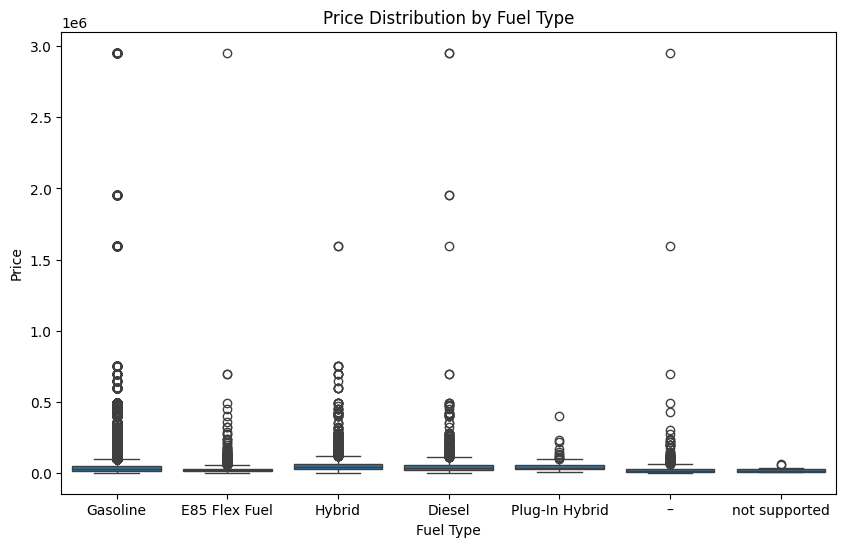

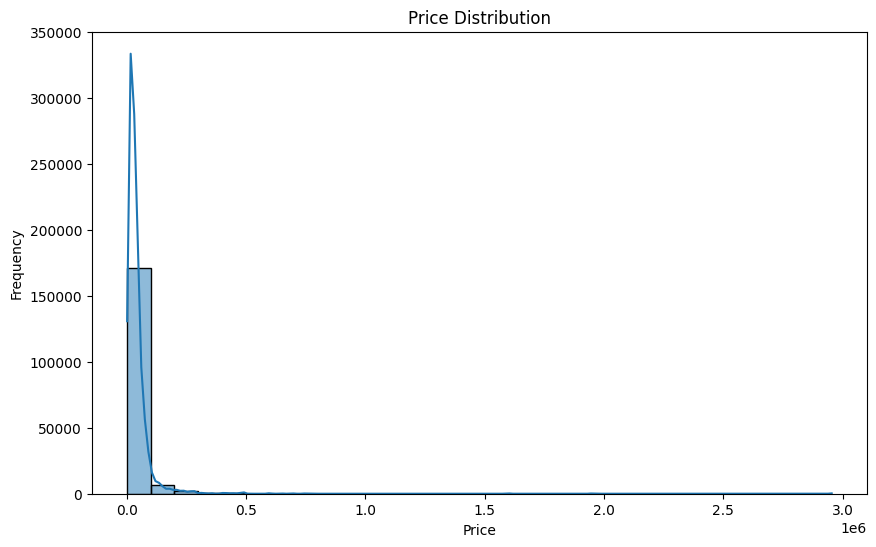

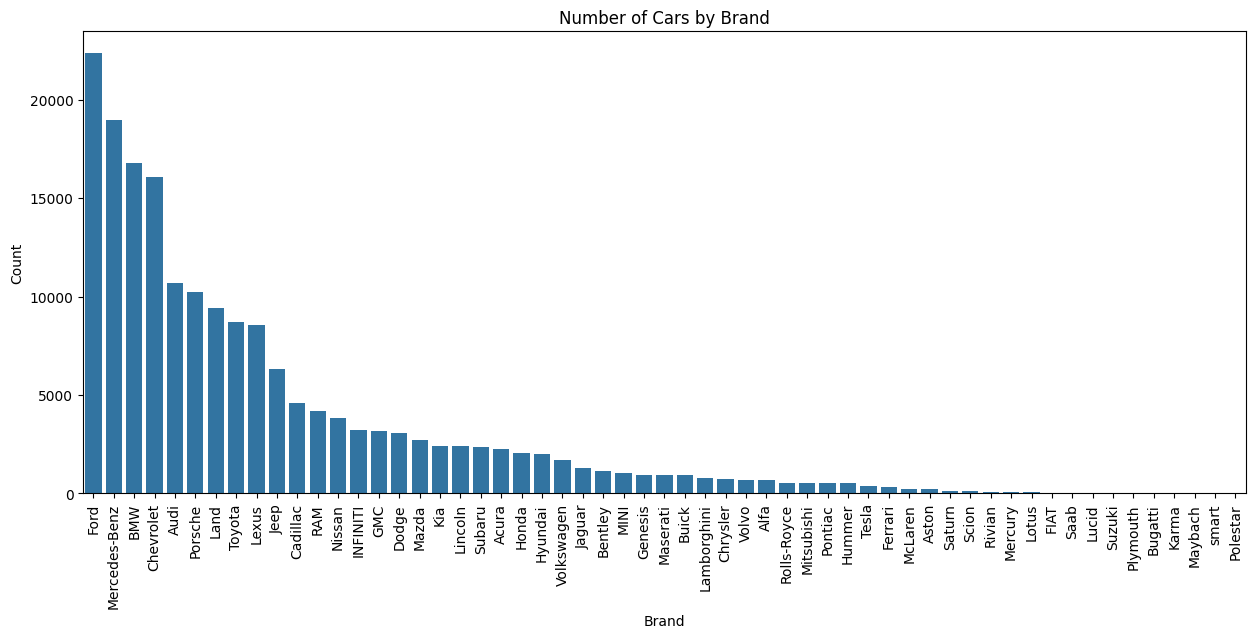

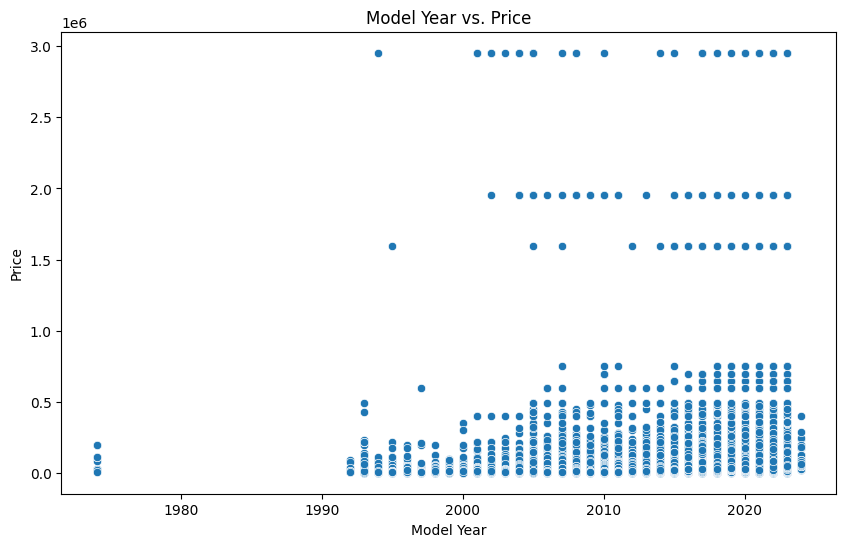

In [44]:

# box plot to visualize the distribution of price by fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', data=df_train)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

#  histogram to visualize the distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(df_train['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#  bar chart to visualize the count of cars by brand
brand_counts = df_train['brand'].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Number of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


#scatter plot to visualize the relationship between model year and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='price', data=df_train)
plt.title('Model Year vs. Price')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()


In [45]:

df_train_c1 = df_train.copy()
df_test_c1= df_test.copy()

In [46]:
df_train_c1['brand_popularity'] = df_train_c1['brand'].map(df_train_c1['brand'].value_counts())


In [47]:
df_test_c1['brand_popularity'] = df_test_c1['brand'].map(df_test_c1['brand'].value_counts())


In [48]:
df_train_c1.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  brand_popularity  
0                           None reported         Yes   4200              1050  
1  At least 1 accident or damage reported         Yes   4999              2391  
2                           None reported         Yes  13900             16084  
3                           None reported         Yes  45000               951  
4                           None reported         Yes  97500             18944

In [50]:
df_train_c1["model_year"].value_counts()

model_year
2021    16978
2018    15657
2020    14994
2019    14929
2022    14293
2016    13355
2017    12375
2015    11225
2014     8264
2023     7705
2013     6719
2011     6202
2012     6004
2008     5107
2007     4832
2010     4198
2005     3089
2006     2793
2009     2690
2004     2553
2003     1886
2001     1517
2002     1263
2000      552
1999      552
1998      337
1997      312
1996      186
2024      150
1993      135
1995      100
1994       92
1992       13
1974       10
Name: count, dtype: int64

In [58]:
#Assuming that data is taken at 2023
df_train_c1['car_age'] = 2023 - df_train_c1['model_year']
df_test_c1['car_age'] = 2023 - df_test_c1['model_year']

In [52]:
df_train_c1.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  \
0                           None reported         Yes   4200   
1  At least 1 accident or damage reported         Yes   4999   
2                           None reported         Yes  13900   
3                           None reported         Yes  45000   
4                           None reported         Yes  97500   

   brand_popularity  car_age  
0              1050       16  
1              2391       21  
2             16084       21  
3               951        6  
4             18944        2

In [53]:
brand_model_prices = df_train.groupby(['brand', 'model'])['price'].mean()
df_train_c1['brand_model_price'] = df_train_c1.apply(lambda row: brand_model_prices[row['brand'], row['model']], axis=1)
df_test_c1['brand_model_price'] = df_test_c1.apply(lambda row: brand_model_prices.get((row['brand'], row['model']), 0), axis=1)  # Handle unseen combinations in test set.


In [55]:
df_train_c1.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  \
0                           None reported         Yes   4200   
1  At least 1 accident or damage reported         Yes   4999   
2                           None reported         Yes  13900   
3                           None reported         Yes  45000   
4                           None reported         Yes  97500   

   brand_popularity  car_age  brand_model_price  
0              1050       16       12793.811189  
1              2391       21       11972.785714  
2             16084       21       24164.000000  
3               951        6       47788.351064  
4             18944        2       64353.887379

In [56]:
df_train_c1.shape

(181067, 16)

In [57]:
df_test_c1.shape

(56633, 15)

In [61]:
df_train.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

In [62]:
df_train_c1.drop("id",axis=1,inplace=True)
df_test_c1.drop("id",axis=1,inplace=True)

In [63]:
df_train_c1.columns
df_test_c1.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'brand_popularity', 'car_age', 'brand_model_price'],
      dtype='object')

In [64]:
df_test.head()

id brand                 model  model_year   milage fuel_type  \
0  188533  Land        Rover LR2 Base      2015.0  98000.0  Gasoline   
1  188534  Land     Rover Defender SE      2020.0   9142.0    Hybrid   
2  188535  Ford    Expedition Limited      2022.0  28121.0  Gasoline   
3  188536  Audi         A6 2.0T Sport      2016.0  61258.0  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus      2018.0  59000.0  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

           ext_col int_col       accident clean_title  
0            White   Beige  None reported         Yes  
1           Silver   Black  None reported         Yes  
2            White   Ebony  None reported         Yes  
3  Silician Yellow   Black  None reported         Yes  
4             Gray   Black  None reported         Yes

In [65]:
df_train_c1['price'].skew()


20.35881937155954

In [66]:
np.log(df_train_c1['price']).skew()


0.12808630718408875

In [67]:
df_train_c1.dtypes

brand                 object
model                 object
model_year             int64
milage                 int64
fuel_type             object
engine                object
transmission          object
ext_col               object
int_col               object
accident              object
clean_title           object
price                  int64
brand_popularity       int64
car_age                int64
brand_model_price    float64
dtype: object

In [68]:
df_cate=df_train_c1.select_dtypes(exclude=['int64',"float64"])
df_cate

brand                     model      fuel_type  \
0                MINI             Cooper S Base       Gasoline   
1             Lincoln                     LS V8       Gasoline   
2           Chevrolet         Silverado 2500 LT  E85 Flex Fuel   
3             Genesis          G90 5.0 Ultimate       Gasoline   
4       Mercedes-Benz               Metris Base       Gasoline   
...               ...                       ...            ...   
188528       Cadillac     Escalade ESV Platinum       Gasoline   
188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC       Gasoline   
188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC       Gasoline   
188531           Audi          S5 3.0T Prestige       Gasoline   
188532        Porsche                Macan Base       Gasoline   

                                                   engine  \
0            172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1            252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2       320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3            420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4            208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
...                                                   ...   
188528       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
188529      385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
188530       469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel   
188531                                               3.0L   
188532       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                          transmission                    ext_col int_col  \
0                                  A/T                     Yellow    Gray   
1                                  A/T                     Silver   Beige   
2                                  A/T                       Blue    Gray   
3       Transmission w/Dual Shift Mode                      Black   Black   
4                          7-Speed A/T                      Black   Beige   
...                                ...                        ...     ...   
188528  Transmission w/Dual Shift Mode                      White   Beige   
188529                     8-Speed A/T                      White   Black   
188530                     7-Speed A/T                      White   Black   
188531               1-Speed Automatic  Daytona Gray Pearl Effect   Black   
188532  Transmission w/Dual Shift Mode                      White   Black   

                                      accident clean_title  
0                                None reported         Yes  
1       At least 1 accident or damage reported         Yes  
2                                None reported         Yes  
3                                None reported         Yes  
4                                None reported         Yes  
...                                        ...         ...  
188528                           None reported         Yes  
188529  At least 1 accident or damage reported         Yes  
188530                           None reported         Yes  
188531                           None reported         Yes  
188532                           None reported         Yes  

[181067 rows x 9 columns]

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df_cate.columns:
     df_train_c1[i]=le.fit_transform(df_cate[i])
     print(i)
df_train_c1

brand
model
fuel_type
engine
transmission
ext_col
int_col
accident
clean_title


brand  model  model_year  milage  fuel_type  engine  transmission  \
0          31    494        2007  213000          2     112            38   
1          28    927        2002  143250          2     360            38   
2           9   1570        2002  136731          1     633            38   
3          16    756        2017   19500          2     855            49   
4          36   1074        2021    7388          2     254            23   
...       ...    ...         ...     ...        ...     ...           ...   
188528      8    602        2017   49000          2     858            49   
188529     36    205        2018   28600          2     763            31   
188530     36    222        2021   13650          2     913            23   
188531      3   1466        2022   13895          2     505             1   
188532     43   1025        2016   59500          2     358            49   

        ext_col  int_col  accident  clean_title  price  brand_popularity  \
0           312       71         1            0   4200              1050   
1           263       10         0            0   4999              2391   
2            38       71         1            0  13900             16084   
3            29       14         1            0  45000               951   
4            29       10         1            0  97500             18944   
...         ...      ...       ...          ...    ...               ...   
188528      304       10         1            0  27500              4598   
188529      304       14         0            0  30000             18944   
188530      304       14         1            0  86900             18944   
188531       82       14         1            0  84900             10669   
188532      304       14         1            0  28995             10216   

        car_age  brand_model_price  
0            16       12793.811189  
1            21       11972.785714  
2            21       24164.000000  
3             6       47788.351064  
4             2       64353.887379  
...         ...                ...  
188528        6       51136.359489  
188529        5       56035.168224  
188530        2       64482.875000  
188531        1       37138.593870  
188532        7       41588.256545  

[181067 rows x 15 columns]

In [70]:
df_train_c1.isnull().sum()

brand                0
model                0
model_year           0
milage               0
fuel_type            0
engine               0
transmission         0
ext_col              0
int_col              0
accident             0
clean_title          0
price                0
brand_popularity     0
car_age              0
brand_model_price    0
dtype: int64

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df_cate.columns:
     df_test_c1[i]=le.fit_transform(df_cate[i])
     print(i)
df_test_c1

brand
model
fuel_type
engine
transmission
ext_col
int_col
accident
clean_title


brand  model  model_year    milage  fuel_type  engine  transmission  \
0         26   1365      2015.0   98000.0          2     313            16   
1         26   1352      2020.0    9142.0          3     762            31   
2         14    630      2022.0   28121.0          2     523             3   
3          3    180      2016.0   61258.0          2     182            39   
4          3    179      2018.0   59000.0          2     351            38   
...      ...    ...         ...       ...        ...     ...           ...   
59007     14    630      1998.0  172024.0          1     599            38   
59008     14   1098      2014.0  133504.0          2     609            10   
59009     52    854      2018.0   51300.0          2     478            50   
59010     36    348      2015.0   60000.0          2     249            38   
59011     14    659      2021.0   35921.0          2     916             3   

       ext_col  int_col  accident  clean_title  brand_popularity  car_age  \
0          299       10         1            0              2955      8.0   
1          259       14         1            0              2955      3.0   
2          299       56         1            0              6949      1.0   
3          257       14         1            0              3319      7.0   
4          124       14         1            0              3319      5.0   
...        ...      ...       ...          ...               ...      ...   
59007      299       70         0            0              6949     25.0   
59008      299       14         1            0              6949      9.0   
59009       26       10         1            0              2794      5.0   
59010      299       31         1            0              5924      8.0   
59011       35       14         1            0              6949      2.0   

       brand_model_price  
0           19582.380000  
1           72532.641414  
2           50639.236162  
3           27980.821053  
4           24863.813853  
...                  ...  
59007       50639.236162  
59008       32817.384462  
59009       25848.586207  
59010       23047.051829  
59011       42048.386819  

[56633 rows x 14 columns]

In [73]:
df_test_c1.dtypes

brand                  int64
model                  int64
model_year           float64
milage               float64
fuel_type              int64
engine                 int64
transmission           int64
ext_col                int64
int_col                int64
accident               int64
clean_title            int64
brand_popularity       int64
car_age              float64
brand_model_price    float64
dtype: object

In [74]:
df_train.dtypes


id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [75]:
corr_matrix = df_train_c1.corr()


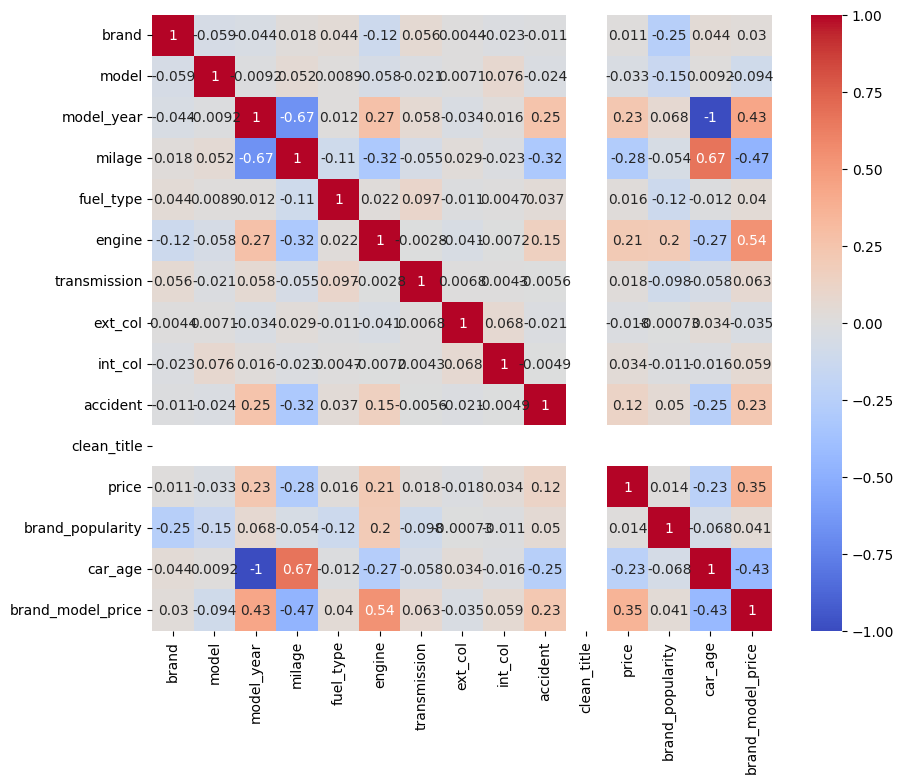

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [77]:
X_train=df_train_c1.drop("price",axis=1)

In [78]:
y_train = df_train_c1['price']
X_test=df_test_c1

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [85]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_reg.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
rmse = np.sqrt(mse_decision_tree)
print(rmse)



109482.10726914466


In [86]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse_xgb)
print(f"rmse:{rmse:}")

print("\nXGBoost Regression:")
print(f"MSE: {mse_xgb:}, R2: {r2_xgb:}, MAE: {mae_xgb:}")


rmse:85524.54543579872

XGBoost Regression:
MSE: 7314447872.0, R2: 0.05522125959396362, MAE: 21098.1796875


In [87]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse:{rmse:}")

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

rmse:82544.41757365047
Mean Squared Error: 6813580872.573176
R-squared: 0.11991623291689635
Mean Absolute Error: 22322.345025111645


In [88]:
print(' y prediction for test value :', y_pred[:])

 y prediction for test value : [ 6479.03300119 81196.67993781 87487.99810068 ... 21000.10179128
 45613.68010488 36313.61249135]


In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
regressor=RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [91]:
y_pred=regressor.predict(X_test)

In [92]:
print(' y prediction for test value :', y_pred[:])

 y prediction for test value : [ 10827.13  79683.1   73183.84 ...  21766.23 121564.4   26556.58]


In [93]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse:{rmse:}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


rmse:84447.97573834565
Mean Squared Error: 7131460606.3042145
R-squared: 0.07885694283530176
Mean Absolute Error: 21883.24813806828
